# Example Solutions to E3

This notebook contains example solutions to the exercises given in <a href="E3 - Exercises on the Cell Membrane.ipynb">E3 — Exercises on the Cell Membrane</a>. As always, it is recommended that you give the exercises a go on your own, before you look at our example solutions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

**Exercise 1a)**

We will implement the step function
$$V_{\rm target}(t) = \begin{cases}
-40 {\rm\ mV} & \mbox{if } 2 {\rm\ ms} < t < 6 {\rm\ ms}, \\
-80 {\rm\ mV}& \mbox{else.}
\end{cases}$$
Implement this as a function `V_target(t)` and plot it in the period $t\in[0, 10]$ ms.

In [4]:
def V_target(t):
    return -80 + 40*(2 < t)*(t < 6)

You can implement this using a normal if-test, but then it only works for a scalar input `t`. With the boolean approach, you can send in a numpy array without problems, making computing and plotting easier and faster

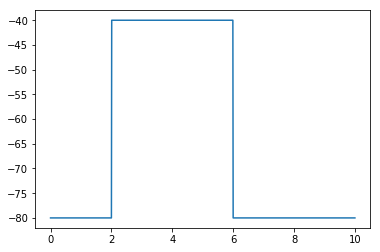

In [5]:
t = np.linspace(0, 10, 1001)

plt.plot(t, V_target(t))
plt.show()

**Exercise 1b)**

We will now do unit analysis on the ODE
$$\frac{{\rm d}V}{{\rm d}t} = \frac{V_{\rm target} - V}{C_{\rm m} R_{\rm s}}.$$


If want to measure $V$ in mV and time in ms. This means the left hand side is given in units of mV/ms. On the right hand side the numerator is also given in terms of $mV$ and the denominator is nF times M$\Omega$, which works out to be ms. In other words, the units are consistent and no changes need to be made.

**Exercise 1c)**

Now, implement the RHS of the ODE-system and use `odeint` to solve it to find the membrane potential $V(t)$ in the period $t \in [0, 10]$ ms. Let the parameters and units be as given in (1b).

Plot your solution.

In [6]:
def rhs(V, t, Cm, Rs):
    dV_dt = (V_target(t) - V)/(Cm*Rs)
    return dV_dt

In [7]:
# Define time array
dt = 0.01
T = 10
time = np.arange(0, T, dt)

# Define parameters
Cm = 0.05 # nF
Rs = 10 # MOhm
params = (Cm, Rs)

# Define initial condition
V0 = -80 # mV

# Call odeint
V = odeint(rhs, V0, time, params)

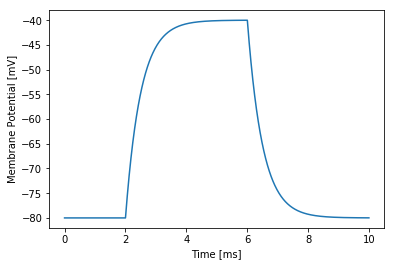

In [8]:
# Plot Solution
plt.plot(time, V)
plt.xlabel('Time [ms]c')
plt.ylabel('Membrane Potential [mV]')
plt.show()

**Exercise 1d)**

Compare your solution of $V(t)$ to your plot of the prescribed $V_{\rm target}(t)$. Describe the differences. 

To make comparison easier, it might be a nice idea to plot the two over each other in the same figure.

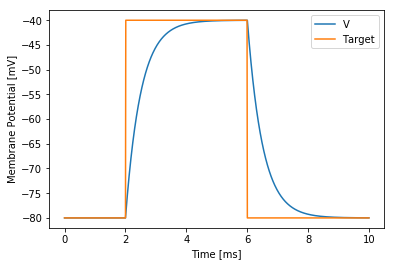

In [12]:
# Plot Solution
plt.plot(time, V)
plt.plot(time, V_target(time))
plt.xlabel('Time [ms]')
plt.ylabel('Membrane Potential [mV]')
plt.legend(['V', 'Target'])
plt.show()

We see that the membrane potential $V$ does follow the target potential, but with a substantial delay. While the target is a step change, i.e., instantaneous change, the membrane potential needs time to copy this change.

**(Optional) Exercise 1e)**

We will solve the following ODE analytically
$$\frac{{\rm d}V}{{\rm d}t} = \frac{V_{\rm target} - V}{C_{\rm m} R_{\rm s}}.$$
If we redefine $u = V_{\rm target} - V$, we see that the ODE is separabel:
$$-\frac{{\rm d}u}{{\rm d}t} = \frac{u}{C_{\rm m} R_{\rm s}}.$$
So we flip it around to be
$$- \frac{1}{u} {\rm\ d}u = \frac{1}{C_{\rm m} R_{\rm s}} {\rm\ d}t.$$
Integrating gives
$$\ln u = -\frac{t}{C_{\rm m} R_{\rm s}} + C.$$
or
$$u = Ae^{-t/(C_{\rm m}\cdot R_{\rm s})}.$$
Now we insert for $u$ so we get
$$V(t) = V_{\rm target} - Ae^{-t/(C_{\rm m}\cdot R_{\rm s})}.$$
We know that $V(0) = V_0$ so we get
$$V(t) = V_{\rm target} - (V_{\rm target} - V_0)e^{-t/(C_{\rm m}\cdot R_{\rm s})}.$$
This means the function is an exponential decay towards the target value, with a time constant of $\tau = C_{\rm m}\cdot R_{\rm s}.$

### Exercise 2: Calculating Nernst Potentials

**Exercise 2a)**

We will calculate the Nernst potential for sodium, potassium and calcium. We use the formula
$$E_{\rm X} = \frac{RT}{zF}\ln \frac{[{\rm X}]_{\rm e}}{[{\rm X}]_{\rm i}}.$$
If you go through the units, you will notice we get answers in terms of volts, but we want to print them in millivolts, so we scale them by $10^3$ before printing.

In [19]:
F = 96485 # C/mol
R = 8.314 # J/(mol K)
T = 310   # K

E_Na = R*T/F * np.log(110/8)
E_K = R*T/F * np.log(4/100)
E_Ca = R*T/(2*F) * np.log(1/0.0002)

E_Na *= 1e3
E_K *= 1e3
E_Ca *= 1e3

print(f"Equilibrium potential for Na: {E_Na:5.1f} mV")
print(f"Equilibrium potential for K:  {E_K:5.1f} mV")
print(f"Equilibrium potential for Ca: {E_Ca:5.1f} mV")

Equilibrium potential for Na:  70.0 mV
Equilibrium potential for K:  -86.0 mV
Equilibrium potential for Ca: 113.8 mV


**Exercise 2b)**

Looking at the concentrations of the three ions. We see that there is a large inward concentration gradient for sodium and calcium, which is why their Nernst potentials are positive, because a higher potential inside than outside will balance out the inward concentration gradient. For potassium however, the concentration gradient is the other direction, so we need to have a potential difference in the other direction to balance this gradient, which is why we get a negative potential in that case.

**Exercise 2c)**

We will use the equation
$$\Delta Q = C_m \Delta V$$
to approximate the amount of charge that passes through the membrane when we go from $V=-80$ mV to $V=+40$ mV.

In [23]:
Cm = 0.05 # nF
dV = 120 # mV
dQ = Cm*dV

print(f"Approximately {dQ:.1f} pC travels through the membrane.")

Approximately 6.0 pC travels through the membrane.


**Exercise 2d)**

We now find the number of ions $6.0$ pC corresponds to. Using Faraday's constant, we find

In [34]:
F = 96485 # C/mol
dNa = dQ/F
print(f"Roughly {dNa:.1g} picomols pass through the membrane.")

Roughly 6e-05 picomols pass through the membrane.


Which is a quite a tiny amount! 

**Exercise 2e)**

Assuming 20 picoliters volume, we get a concentration change of

In [59]:
V = 20 # picoliters
dconc = dNa/V*1e3
rel = 1 - (8-dconc)/8 # Relative change in intracellular sodium

print(f"Absolute concentration change: {dconc:.4f} mM")
print(f"Relative concentration change: {rel:.3%}")

Absolute concentration change: 0.0031 mM
Relative concentration change: 0.039%


So we see the relative change is less than a tenth of a percent.

**Exercise 2f)**


In [67]:
E_Na = R*T/F * np.log(110/8)
E_Na *= 1e3
print(f"Original E_Na:              {E_Na:.1f} mV")

E_Na = R*T/F * np.log(110/(1.3*8))
E_Na *= 1e3
print(f"After 30% increase in Na:   {E_Na:.1f} mV")

Original E_Na:              70.0 mV
After 30% increase in Na:   63.0 mV


We see that even a shift as dramatic as 30% in the intracellular concentration shifts the Nernst potential by only 7 mV. Considering the differences between the different species' Nernst potentials are on the order of 100 mV, a change of 7 mV is actually quite small.

**Exercise 2g)**

As is mentioned in the exercise discussion, the last two exercises show that (1) ion transport through the membrane changes concentrations very little, and (2) even large changes in concentration lead to little change in the Nernst potential. When combined, these two facts indicate that we can treat the Nernst potential as a constant. (With the exception of calcium).

### Exercise 3: The Equilibrium Membrane Potential

Recall from the lecture that for a membrane only permeable to sodium, the membrane potential will be governed by the ODE
Where $C_{\rm m}$ is the membrane potential, and $g_{\rm Na}$ is the sodium conductance.

**Exercise 3a)**

We will solve the following ODE numerically
$$C_{\rm m}\frac{{\rm d}V}{{\rm d}t} = - g_{\rm Na} (V-E_{\rm Na}).$$

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [89]:
# Define the ODE
def rhs(V, t, Cm, g_Na, E_Na):
    dV_dt = -g_Na*(V - E_Na)/Cm
    return dV_dt

# Define the time array
T = 100
dt = 0.01
time = np.arange(0, T, dt)

# Define the parameters and initial condition
Cm = 0.05 # nF
g_Na = 0.005 # µS
params = (Cm, g_Na, E_Na)
V0 = -80 # mV

# Solve the ODE
V = odeint(rhs, V0, time, params)

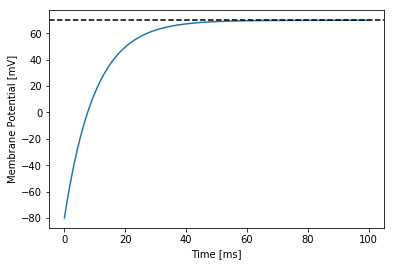

In [90]:
plt.plot(time, V)
plt.axhline(E_Na, linestyle='--', color='black')
plt.xlabel('Time [ms]')
plt.ylabel('Membrane Potential [mV]')
plt.show()

**(Optional) Exercise 3b)**

We now solve the ODE analytically. It is almost identical to what we solved earlier, and we carry out the same process. First we substitute $u = V-E_{\rm Na}$ to find:
$$\frac{1}{u} \frac{{\rm d}u}{{\rm d}t} = -\frac{g_{\rm Na}}{C_{\rm m}}.$$
Which is a separabel ODE, so we get
$$u(t) = Ce^{-t\cdot g_{\rm Na}/C_{\rm m}}.$$
So we get
$$V(t) = E_{\rm Na} + (V_0 - E_{\rm Na})e^{-t/\tau},$$
where $\tau = g_{\rm Na}/C_{\rm m}$. So we see the solution is an exponential decay to the Nernst potential, with a time constant of $g_{\rm Na}/C_{\rm m}$. Thus, the bigger the conductance of the channels, the bigger the current, and the faster the change in potential, and the bigger the capacitance, the harder it is to change the membrane potential, so it takes longer.

**Exercise 3c)**

We see that it takes 25-50 ms for the membrane potential to reach equilibrium. 

The time constant we found analytically is
$$\tau = \frac{g_{\rm Na}}{C_{\rm m}} = \frac{0.005 {\rm\ µS}}{0.05 {\rm\ nF}} = 10 {\rm\ ms}.$$
Which seems to be right from the plot. At $t=\tau$, the solution should have reached 1/e'th from the equilibrium.

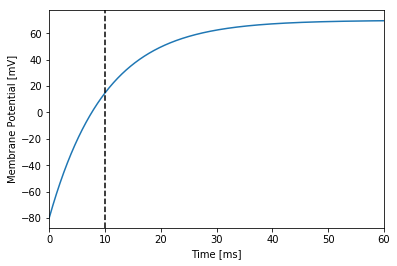

In [92]:
plt.plot(time, V)
plt.axvline(10, linestyle='--', color='black')
plt.xlabel('Time [ms]')
plt.ylabel('Membrane Potential [mV]')
plt.xlim(0, 60)
plt.show()

**Exercise 3d)**

We copy our code from above, and add the two new currents

In [93]:
# Define the ODE
def rhs(V, t, Cm, g_Na, g_K, g_Ca, E_Na, E_K, E_Ca):
    dV_dt = -(g_Na*(V - E_Na) + g_K*(V - E_K) + g_Ca*(V - E_Ca))/Cm
    return dV_dt

# Define the time array
T = 100
dt = 0.01
time = np.arange(0, T, dt)

# Define the parameters and initial condition
Cm = 0.05 # nF
g_Na = 0.005 # µS
g_K = 0.05 # µS
g_Ca = 0.002 # µS
params = (Cm, g_Na, g_K, g_Ca, E_Na, E_K, E_Ca)
V0 = 0 # mV

# Solve the ODE
V = odeint(rhs, V0, time, params)

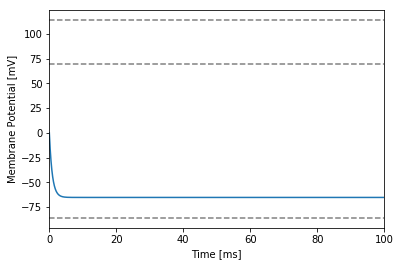

In [94]:
plt.plot(time, V)
plt.axhline(E_Na, linestyle='--', color='grey')
plt.axhline(E_Ca, linestyle='--', color='grey')
plt.axhline(E_K, linestyle='--', color='grey')
plt.xlabel('Time [ms]')
plt.ylabel('Membrane Potential [mV]')
plt.xlim(0, 100)
plt.show()

**Exercise 3e)**

From the plot we can see that the equilibrium looks to be about -65 mV. If we want to write it out, we can read out the last value of the `V` variable, which is a numpy array, using negative indexing let's us read the last element:

In [101]:
print(f"Equilibrium potential: {float(V[-1]):.1f} mV")

Equilibrium potential: -65.3 mV


Rerunning with a different initial condition shows us that the equilibrium does not change.

The equilibrium potential becomes -65 mV in this case, because this is a balancing point between the three currents. Each current individually wants to membrane potential to be equal to their Nernst potential, so the sodium and calcium currents are pulling $V$ upwards, while the potassium current  is pulling it down. Because we have set the potassium current to be so much stronger $g_{\rm K} \gg g_{\rm Na} \approx g_{\rm Ca}$, we see that it wins this *"tug-of-war"* and the equilibrium lies close to the Nernst potential for potassium.

**Exercise 3f)**

Playing around with the widget we find that we must max out the potassium conductance ($g_{\rm K} = 25-30$ µS) and minimize the calcium and sodium conductances (for example $g_{\rm Na} =1$ µS and $g_{\rm Ca}=0$ µS), to end up at -80 mV.

This shouldn't be too surprising, as -80 mV is very close to the Nernst potential for potassium, meaning potassium should be dominating when the cell is resting. In practice we find that the potassium conductance at rest is indeed about 25-fold that of the combined sodium and calcium conductances.

### Exercise 4: A super simple action potential model

#### Exercise 4a)

We now solve the ODE
$$C_{\rm m}\frac{{\rm d}V}{{\rm d}t} = -g_{\rm Na} (V-E_{\rm Na}) - g_{\rm K} (V-E_{\rm K}).$$
With a time dependent sodium conductance:
$$g_{\rm Na}(t) = \begin{cases}
0.75 {\rm\ µS} & \mbox{if } 2 {\rm\ ms} < t < 2.2 {\rm\ ms}, \\
0.003 {\rm\ µS} & \mbox{else.}
\end{cases}$$

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [105]:
# Define the ODE
def rhs(V, t, Cm, g_K, E_Na, E_K):
    g_Na = 0.55 if 2 < t < 2.2 else 0.003
    dV_dt = (-g_Na*(V-E_Na) - g_K*(V-E_K))/Cm
    return dV_dt

# Define the time array
T = 10
dt = 0.01
time = np.arange(0, T, dt)

# Define the parameters and initial condition
Cm = 0.05
g_K = 0.075
E_Na = 70
E_K = -86
params = (Cm, g_K, E_Na, E_K)
V0 = -80

# Solve the ODE
V = odeint(rhs, V0, time, params, hmax=dt)

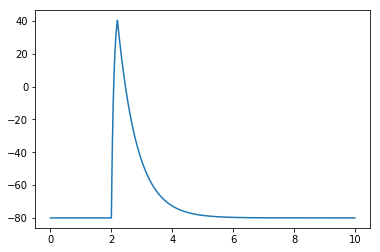

In [106]:
plt.plot(time, V)
plt.show()

#### Exercise 4b)

We see that before $t=2$ ms, the cell is resting with a membrane potential at around -80 mV. At $t=2$ ms, the sodium channels open and we see a very rapid increase in the membrane potential. This is because the balance between the inward sodium current and the outward potassium current has been dramatically shifted.

While the sodium current would like to approach the Nernst potential for sodium at around +70 mV, the membrane is not given enough time to do this. Instead, at $t=2.2$ ms, the channels close again. This means that the balance is again shifted to the stronger potassium current, and the membrane potential drops down to its resting membrane potential at around -80 mV.

The membrane potential is always driven by passive ion transport, i.e., electrodiffusion. The underlying driving force therefore never changes. The only changes over time is what channels are open, i.e., what ions are permitted to diffuse through the membrane.